In [1]:
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# UNCOMMENT THE ABOVE IF YOU CHANGE THE *.py FILE AND WANT TO RELOAD THEM
# import utils
# import unstable_em_svm
# import stable_em_svm
# import ecme_svm
# import mcmc_svm
#
# importlib.reload(utils)
# importlib.reload(unstable_em_svm)
# importlib.reload(stable_em_svm)
# importlib.reload(ecme_svm)
# importlib.reload(mcmc_svm)



from unstable_em_svm import compute_unstable_em_svm
from utils import compute_target
from stable_em_svm import compute_stable_em_svm
from ecme_svm import compute_ecme_svm
from mcmc_svm import compute_mcmc_svm, compute_mcmc_svm_with_nu



# 1) Testing on Spam database

In [3]:
df_spam = pd.read_csv('spambase.data', header=None)

df_spam.columns = [f'f{str(i).zfill(2)}' for i in range(df_spam.columns.shape[0] - 1)] + ['spam']

X_spam = df_spam[[c for c in df_spam.columns if c.startswith('f')]].values
y_spam = 2.0 * df_spam['spam'].values.reshape(-1, 1) - 1.0
X_spam = np.column_stack([np.ones(X_spam.shape[0]), X_spam])

df_spam

,f00,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## 1) (Unstable) EM-SVM

In [4]:
betas = compute_unstable_em_svm(X_spam, y_spam, alpha=1.0, nu=1.0, abs_eps=1e-3, max_iterations=500, noisy=True, noise_period=15, seed=0)

At iteration (015/500), loss = 1955.751
At iteration (030/500), loss = 1188.739
At iteration (045/500), loss = 1053.417


/home/ahmed/Documents/Notebooks/bml/unstable_em_svm.py:60: RuntimeWarning: divide by zero encountered in true_divide
  lam_inv = 1 / np.abs(1 - yX @ beta)
/home/ahmed/Documents/Notebooks/bml/unstable_em_svm.py:69: RuntimeWarning: invalid value encountered in matmul
  yX.T @ (1 + lam_inv),


At iteration (060/500), loss = nan
At iteration (075/500), loss = nan
At iteration (090/500), loss = nan
At iteration (105/500), loss = nan
At iteration (120/500), loss = nan
At iteration (135/500), loss = nan
At iteration (150/500), loss = nan
At iteration (165/500), loss = nan
At iteration (180/500), loss = nan
At iteration (195/500), loss = nan
At iteration (210/500), loss = nan
At iteration (225/500), loss = nan
At iteration (240/500), loss = nan
At iteration (255/500), loss = nan
At iteration (270/500), loss = nan
At iteration (285/500), loss = nan
At iteration (300/500), loss = nan
At iteration (315/500), loss = nan
At iteration (330/500), loss = nan
At iteration (345/500), loss = nan
At iteration (360/500), loss = nan
At iteration (375/500), loss = nan
At iteration (390/500), loss = nan
At iteration (405/500), loss = nan
At iteration (420/500), loss = nan
At iteration (435/500), loss = nan
At iteration (450/500), loss = nan
At iteration (465/500), loss = nan
At iteration (480/50

## 2) (Stable) EM-SVM (learning $\beta$)

In [5]:
betas = compute_stable_em_svm(X_spam, y_spam, alpha=1.0, nu=1.0, abs_eps=1e-3, max_iterations=2000, noisy=True, noise_period=100, seed=0)

At iteration (0100/2000), loss = 947.804
At iteration (0200/2000), loss = 940.933
At iteration (0300/2000), loss = 937.144
At iteration (0400/2000), loss = 934.687
At iteration (0500/2000), loss = 933.452
At iteration (0600/2000), loss = 932.194
At iteration (0700/2000), loss = 931.016
At iteration (0800/2000), loss = 929.915
At iteration (0900/2000), loss = 928.369
At iteration (1000/2000), loss = 927.235
At iteration (1100/2000), loss = 926.701
At iteration (1200/2000), loss = 925.976
At iteration (1300/2000), loss = 925.826
At iteration (1400/2000), loss = 925.826
At iteration (1500/2000), loss = 925.788
Finished run (1560/2000), loss = 925.780


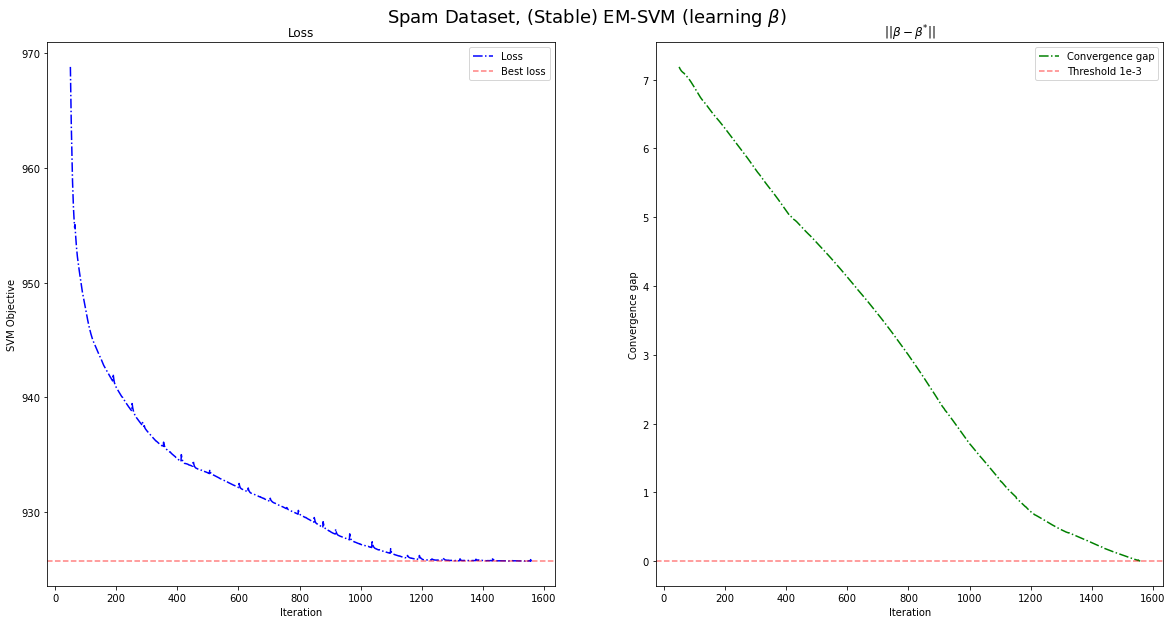

In [6]:
start_ind = 50

losses = np.array([compute_target(X_spam, y_spam, alpha=1, nu=1, beta=beta) for beta in betas])
convergence_gap = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap)), convergence_gap[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

plt.suptitle(r'Spam Dataset, (Stable) EM-SVM (learning $\beta$)', fontsize=18, y=0.93)

plt.show()

## 3) ECME-SVM (learning $\nu$ as well as $\beta$)

In [7]:
betas, nus = compute_ecme_svm(X_spam, y_spam, alpha=1, anu=1, bnu=1, abs_eps=1e-3, max_iterations=2000, noisy=True, noise_period=100, seed=0)

At iteration (0100/2000), loss = 962.227
At iteration (0200/2000), loss = 951.279
At iteration (0300/2000), loss = 945.711
At iteration (0400/2000), loss = 943.037
At iteration (0500/2000), loss = 942.247
At iteration (0600/2000), loss = 941.703
At iteration (0700/2000), loss = 940.888
At iteration (0800/2000), loss = 939.909
At iteration (0900/2000), loss = 938.930
At iteration (1000/2000), loss = 938.122
At iteration (1100/2000), loss = 937.349
At iteration (1200/2000), loss = 936.441
At iteration (1300/2000), loss = 936.397
At iteration (1400/2000), loss = 936.451
At iteration (1500/2000), loss = 936.170
Finished run (1534/2000), loss = 936.414


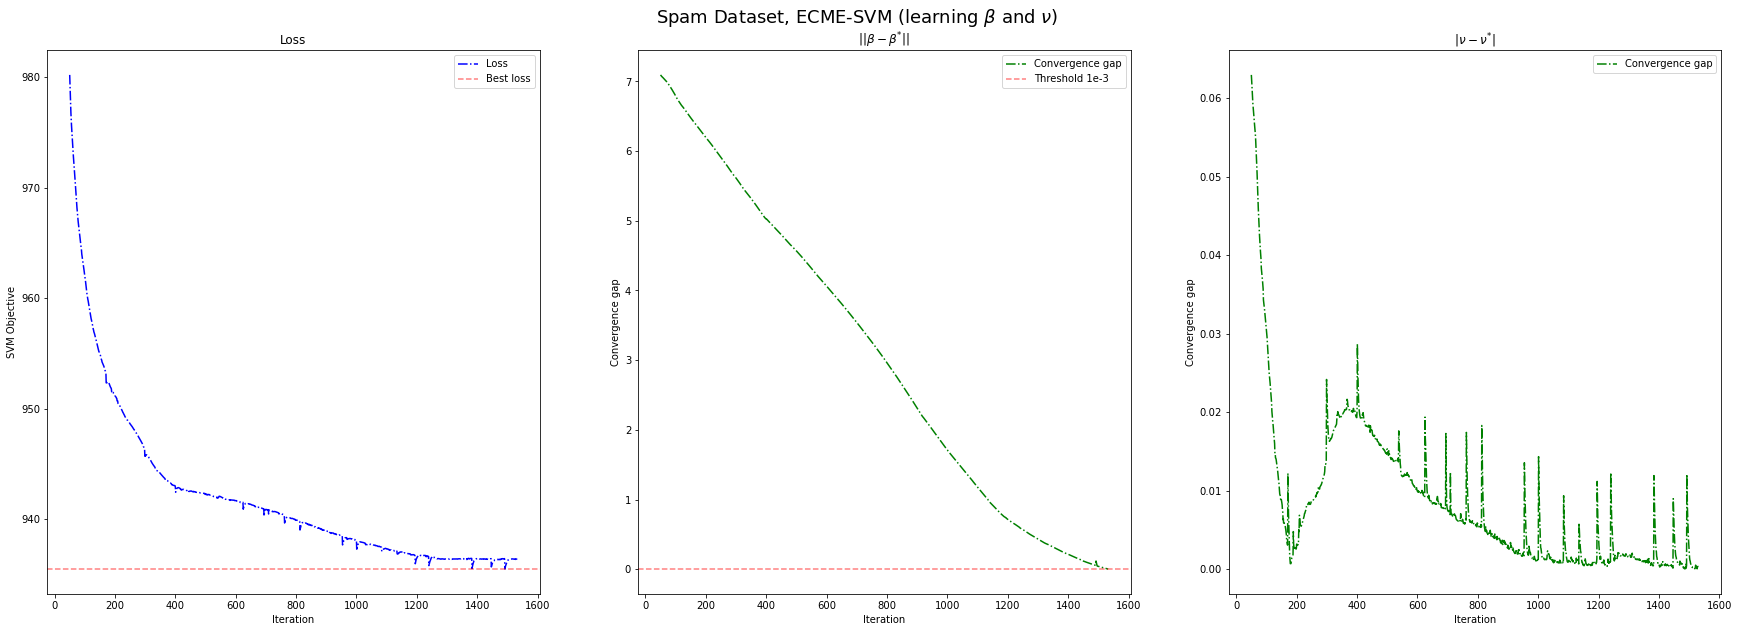

In [8]:
start_ind = 50

losses = np.array([compute_target(X_spam, y_spam, alpha=1, nu=nu, beta=beta) for beta, nu in zip(betas, nus)])
convergence_gap_beta = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]
convergence_gap_nu = np.abs(nus - nus[-1])[:-1]

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap_beta)), convergence_gap_beta[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

axes[2].plot(np.arange(start_ind, len(convergence_gap_nu)), convergence_gap_nu[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Convergence gap')
axes[2].set_title(r'$|\nu - \nu^{*}|$')
axes[2].legend()

plt.suptitle(r'Spam Dataset, ECME-SVM (learning $\beta$ and $\nu$)', fontsize=18, y=0.94)

plt.show()

## 4) MCMC-SVM (learning $\beta$ with MC)

In [9]:
betas, b_values = compute_mcmc_svm(X_spam, y_spam, nu=1, max_iterations=2000, noisy=True, noise_period=200, abs_eps=1e-3, seed=0)

At iteration (0200/2000), loss = 953.576
At iteration (0400/2000), loss = 959.950
At iteration (0600/2000), loss = 954.053
At iteration (0800/2000), loss = 951.905
At iteration (1000/2000), loss = 952.906
At iteration (1200/2000), loss = 951.289
At iteration (1400/2000), loss = 946.647
At iteration (1600/2000), loss = 950.411
At iteration (1800/2000), loss = 945.674
At iteration (2000/2000), loss = 952.429
Finished run (2000/2000), loss = 952.429


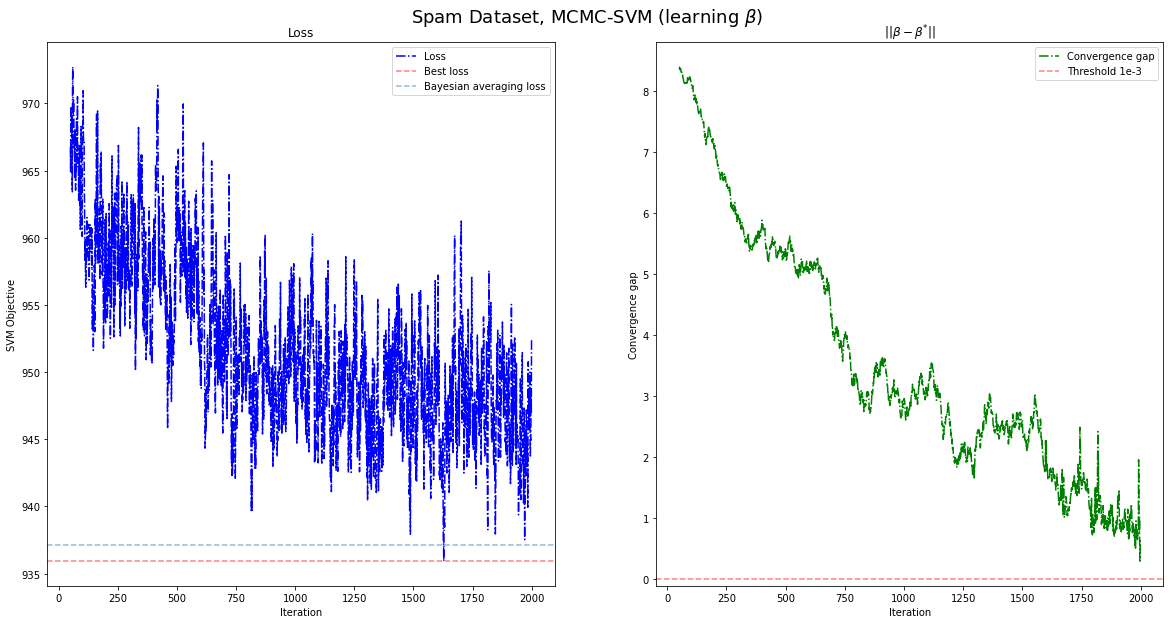

In [10]:
start_ind = 50

losses = np.array([compute_target(X_spam, y_spam, alpha=1, nu=1, beta=beta) for beta in betas])
convergence_gap = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]

b = b_values.mean(axis=0)
bayesian_averaging_loss = compute_target(X_spam, y_spam, alpha=1, nu=1, beta=b)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].axhline(bayesian_averaging_loss, linestyle='--', label='Bayesian averaging loss', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap)), convergence_gap[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

plt.suptitle(r'Spam Dataset, MCMC-SVM (learning $\beta$)', fontsize=18, y=0.93)

plt.show()

## 5) MCMC-SVM (learning $\beta$ as well as $\nu$ with MC)

In [11]:
betas, b_values, nu_values = compute_mcmc_svm_with_nu(X_spam, y_spam, anu=1, bnu=1, max_iterations=2000, noisy=True, noise_period=200, abs_eps=1e-3, seed=0)

At iteration (0200/2000), loss = 1021.052
At iteration (0400/2000), loss = 988.741
At iteration (0600/2000), loss = 1008.137
At iteration (0800/2000), loss = 1015.494
At iteration (1000/2000), loss = 984.743
At iteration (1200/2000), loss = 982.842
At iteration (1400/2000), loss = 981.313
At iteration (1600/2000), loss = 971.641
At iteration (1800/2000), loss = 1002.184
At iteration (2000/2000), loss = 987.774
Finished run (2000/2000), loss = 987.774


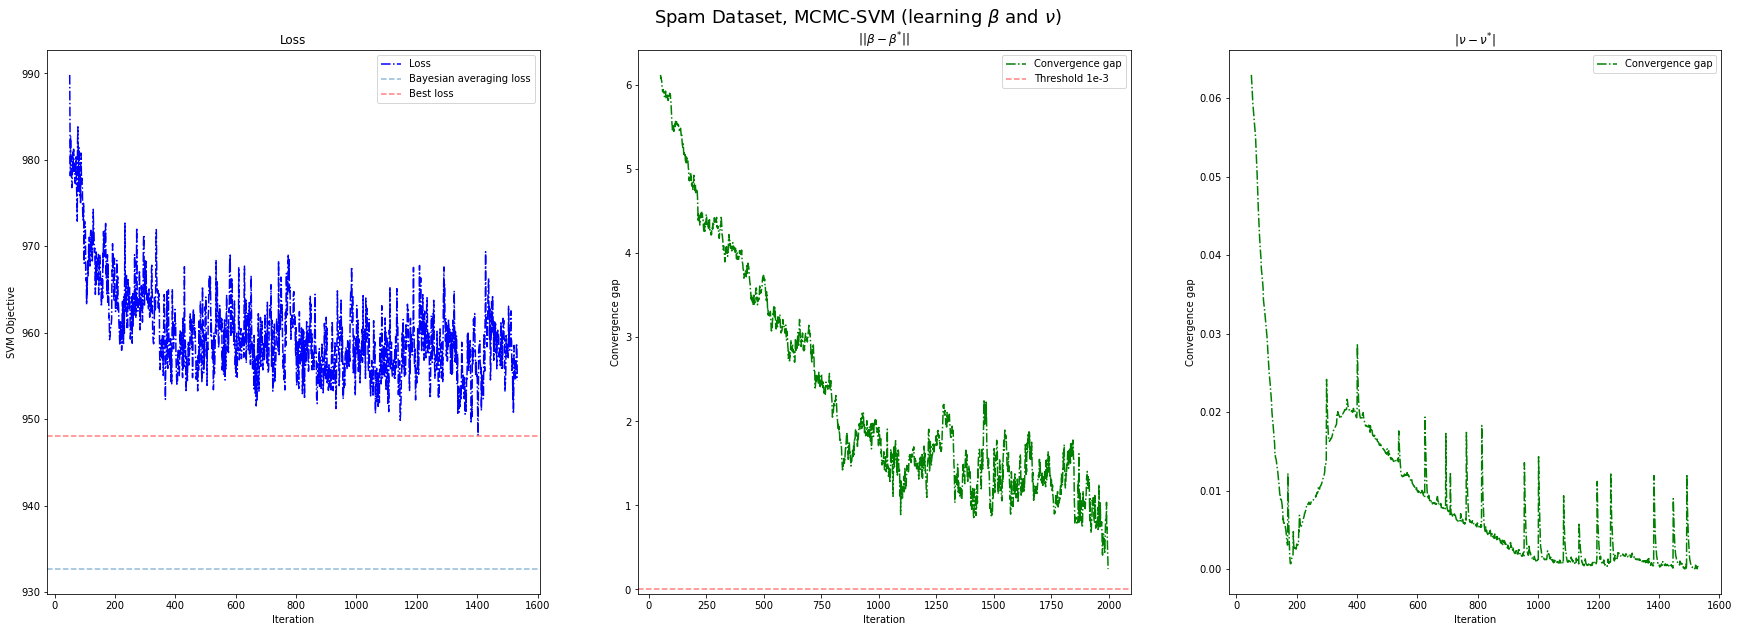

In [12]:
start_ind = 50

losses = np.array([compute_target(X_spam, y_spam, alpha=1, nu=nu, beta=beta) for beta, nu in zip(betas, nus)])
convergence_gap_beta = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]
convergence_gap_nu = np.abs(nus - nus[-1])[:-1]

b = b_values.mean(axis=0)
bayesian_averaging_loss = compute_target(X_spam, y_spam, alpha=1, nu=1, beta=b)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(bayesian_averaging_loss, linestyle='--', label='Bayesian averaging loss', alpha=0.5)
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap_beta)), convergence_gap_beta[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

axes[2].plot(np.arange(start_ind, len(convergence_gap_nu)), convergence_gap_nu[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Convergence gap')
axes[2].set_title(r'$|\nu - \nu^{*}|$')
axes[2].legend()

plt.suptitle(r'Spam Dataset, MCMC-SVM (learning $\beta$ and $\nu$)', fontsize=18, y=0.94)

plt.show()

# 2) Testing on default data

In [13]:
df_default = pd.read_excel('default of credit card clients.xls', skiprows=1, index_col=0)
df_default = pd.get_dummies(df_default, columns=['SEX', 'EDUCATION', 'MARRIAGE'])
df_default = df_default.groupby('default payment next month').apply(lambda x: x.sample(frac=0.15, random_state=0)).reset_index(drop=True)

X_default = df_default[[c for c in df_default if c != 'default payment next month']].values
X_default = MinMaxScaler().fit_transform(X_default)
X_default = np.column_stack([np.ones(X_default.shape[0]), X_default])

y_default = 2.0 * df_default['default payment next month'].values.reshape(-1, 1) - 1

df_default

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,0,0,0,0,0,2,15110,16548,...,0,1,0,0,0,0,0,0,1,0
1,120000,37,0,-1,-1,-1,-1,-1,3014,380,...,0,1,0,0,0,0,0,0,1,0
2,30000,41,0,0,0,0,0,0,26480,27529,...,1,0,0,0,0,0,0,1,0,0
3,390000,39,0,0,-1,-1,-1,-1,42721,22836,...,1,0,0,0,0,0,0,1,0,0
4,500000,30,0,0,0,0,0,0,135634,135796,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,90000,26,-2,-2,-2,-2,-2,-2,2862,0,...,0,0,0,1,0,0,0,0,1,0
4496,90000,28,-1,0,0,0,0,0,12759,10941,...,1,0,0,0,0,0,0,1,0,0
4497,30000,22,0,0,0,0,0,0,28387,29612,...,0,1,0,0,0,0,0,0,1,0
4498,20000,24,0,0,0,0,0,0,2004,3193,...,0,1,0,0,0,0,0,0,1,0


## 1) (Unstable) EM-SVM

In [14]:
betas = compute_unstable_em_svm(X_default, y_default, alpha=1.0, nu=1.0, abs_eps=1e-3, max_iterations=20, noisy=True, noise_period=2, seed=0)

At iteration (02/20), loss = 3963.572
At iteration (04/20), loss = nan
At iteration (06/20), loss = nan


/home/ahmed/Documents/Notebooks/bml/unstable_em_svm.py:63: RuntimeWarning: divide by zero encountered in true_divide
  omega_inv = alpha * ((nu * std / np.abs(beta)) ** (2 - alpha))
/home/ahmed/Documents/Notebooks/bml/unstable_em_svm.py:68: RuntimeWarning: invalid value encountered in matmul
  std_inv_mat @ omega_inv_mat / (nu ** 2) + yX.T @ lam_inv_mat @ yX,


At iteration (08/20), loss = nan
At iteration (10/20), loss = nan
At iteration (12/20), loss = nan
At iteration (14/20), loss = nan
At iteration (16/20), loss = nan
At iteration (18/20), loss = nan
At iteration (20/20), loss = nan
Finished run (20/20), loss = nan


## 2) (Stable) EM-SVM (learning $\beta$)

In [15]:
betas = compute_stable_em_svm(X_default, y_default, alpha=1.0, nu=1.0, abs_eps=1e-3, max_iterations=2000, noisy=True, noise_period=200, seed=0)

Finished run (0072/2000), loss = 1998.273


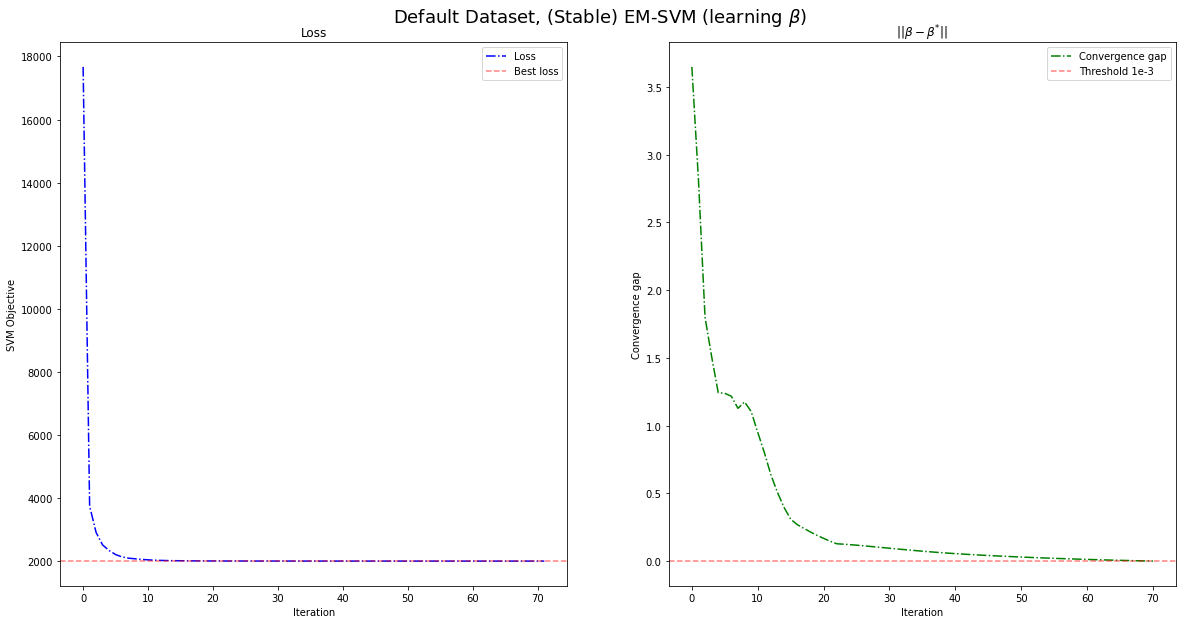

In [16]:
start_ind = 0

losses = np.array([compute_target(X_default, y_default, alpha=1, nu=1, beta=beta) for beta in betas])
convergence_gap = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap)), convergence_gap[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

plt.suptitle(r'Default Dataset, (Stable) EM-SVM (learning $\beta$)', fontsize=18, y=0.93)

plt.show()

## 3) ECME-SVM (learning $\beta$ and $\nu$)

In [17]:
betas, nus = compute_ecme_svm(X_default, y_default, alpha=1, anu=1, bnu=1, abs_eps=1e-3, max_iterations=2000, noisy=True, noise_period=100, seed=0)

Finished run (0067/2000), loss = 2002.534


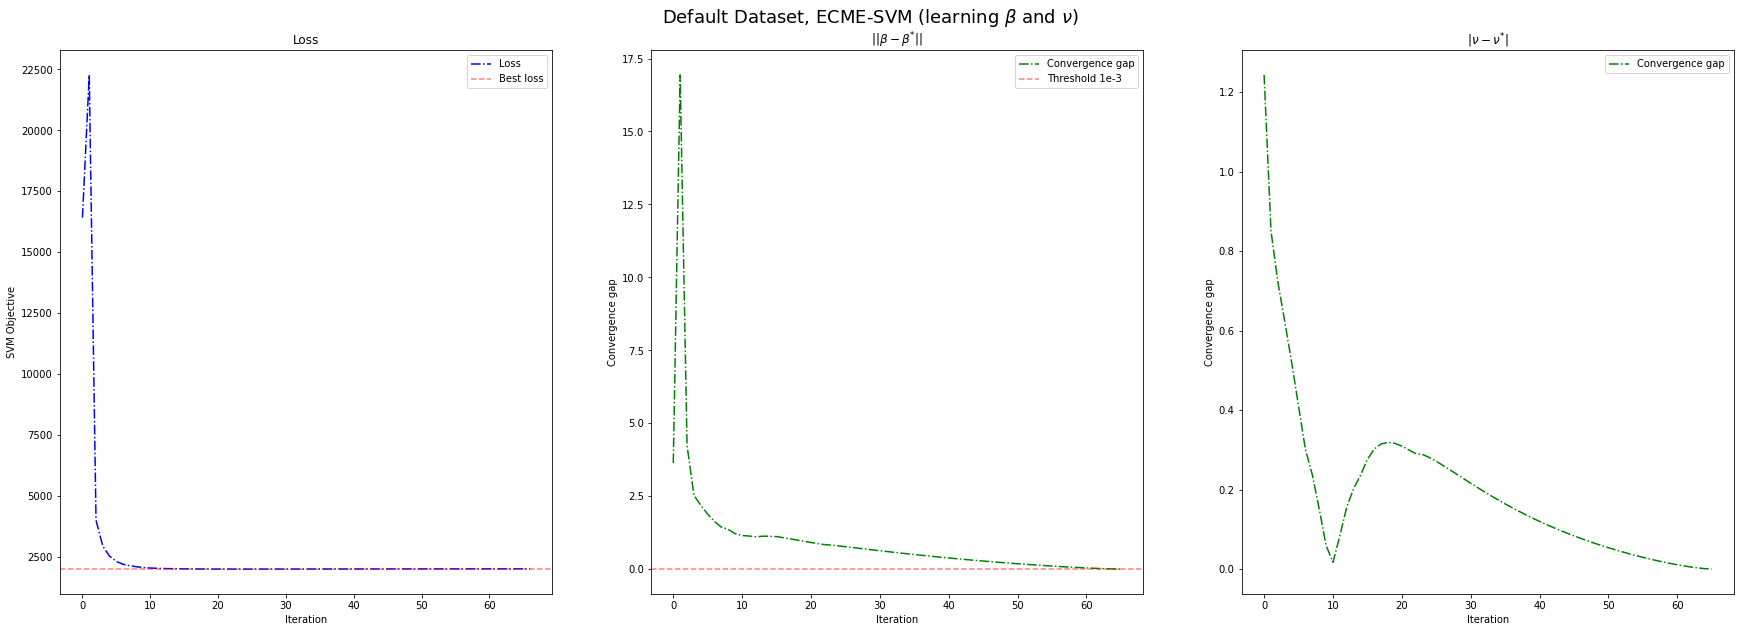

In [18]:
start_ind = 0

losses = np.array([compute_target(X_default, y_default, alpha=1, nu=nu, beta=beta) for beta, nu in zip(betas, nus)])
convergence_gap_beta = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]
convergence_gap_nu = np.abs(nus - nus[-1])[:-1]

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap_beta)), convergence_gap_beta[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

axes[2].plot(np.arange(start_ind, len(convergence_gap_nu)), convergence_gap_nu[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Convergence gap')
axes[2].set_title(r'$|\nu - \nu^{*}|$')
axes[2].legend()

plt.suptitle(r'Default Dataset, ECME-SVM (learning $\beta$ and $\nu$)', fontsize=18, y=0.94)

plt.show()

## 4) MCMC-SVM (learning $\beta$ with MC)

In [19]:
betas, b_values = compute_mcmc_svm(X_default, y_default, nu=1, max_iterations=2000, noisy=True, noise_period=200, abs_eps=1e-3, seed=0)

At iteration (0200/2000), loss = 2017.081
At iteration (0400/2000), loss = 2015.741
At iteration (0600/2000), loss = 2018.478
At iteration (0800/2000), loss = 2024.165
At iteration (1000/2000), loss = 2024.497
At iteration (1200/2000), loss = 2022.113
At iteration (1400/2000), loss = 2023.254
At iteration (1600/2000), loss = 2033.669
At iteration (1800/2000), loss = 2025.412
At iteration (2000/2000), loss = 2030.168
Finished run (2000/2000), loss = 2030.168


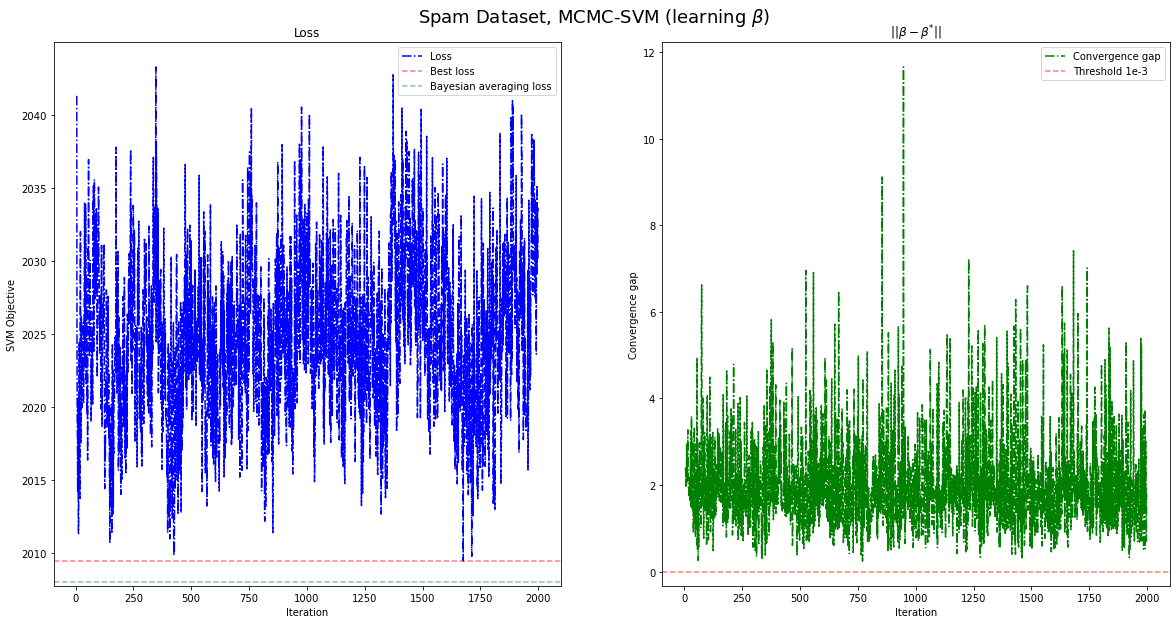

In [20]:
start_ind = 5

losses = np.array([compute_target(X_default, y_default, alpha=1, nu=1, beta=beta) for beta in betas])
convergence_gap = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]

b = b_values.mean(axis=0)
bayesian_averaging_loss = compute_target(X_default, y_default, alpha=1, nu=1, beta=b)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].axhline(bayesian_averaging_loss, linestyle='--', label='Bayesian averaging loss', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap)), convergence_gap[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

plt.suptitle(r'Spam Dataset, MCMC-SVM (learning $\beta$)', fontsize=18, y=0.93)

plt.show()

## 5) MCMC-SVM (learning $\beta$ as well as $\nu$ with MC)

In [21]:
betas, b_values, nu_values = compute_mcmc_svm_with_nu(X_default, y_default, anu=1, bnu=1, max_iterations=2000, noisy=True, noise_period=200, abs_eps=1e-3, seed=0)

At iteration (0200/2000), loss = 2056.442
At iteration (0400/2000), loss = 2021.635
At iteration (0600/2000), loss = 2038.073
At iteration (0800/2000), loss = 2033.475
At iteration (1000/2000), loss = 2033.695
At iteration (1200/2000), loss = 2041.902
At iteration (1400/2000), loss = 2032.545
At iteration (1600/2000), loss = 2058.307
At iteration (1800/2000), loss = 2026.808
At iteration (2000/2000), loss = 2022.140
Finished run (2000/2000), loss = 2022.140


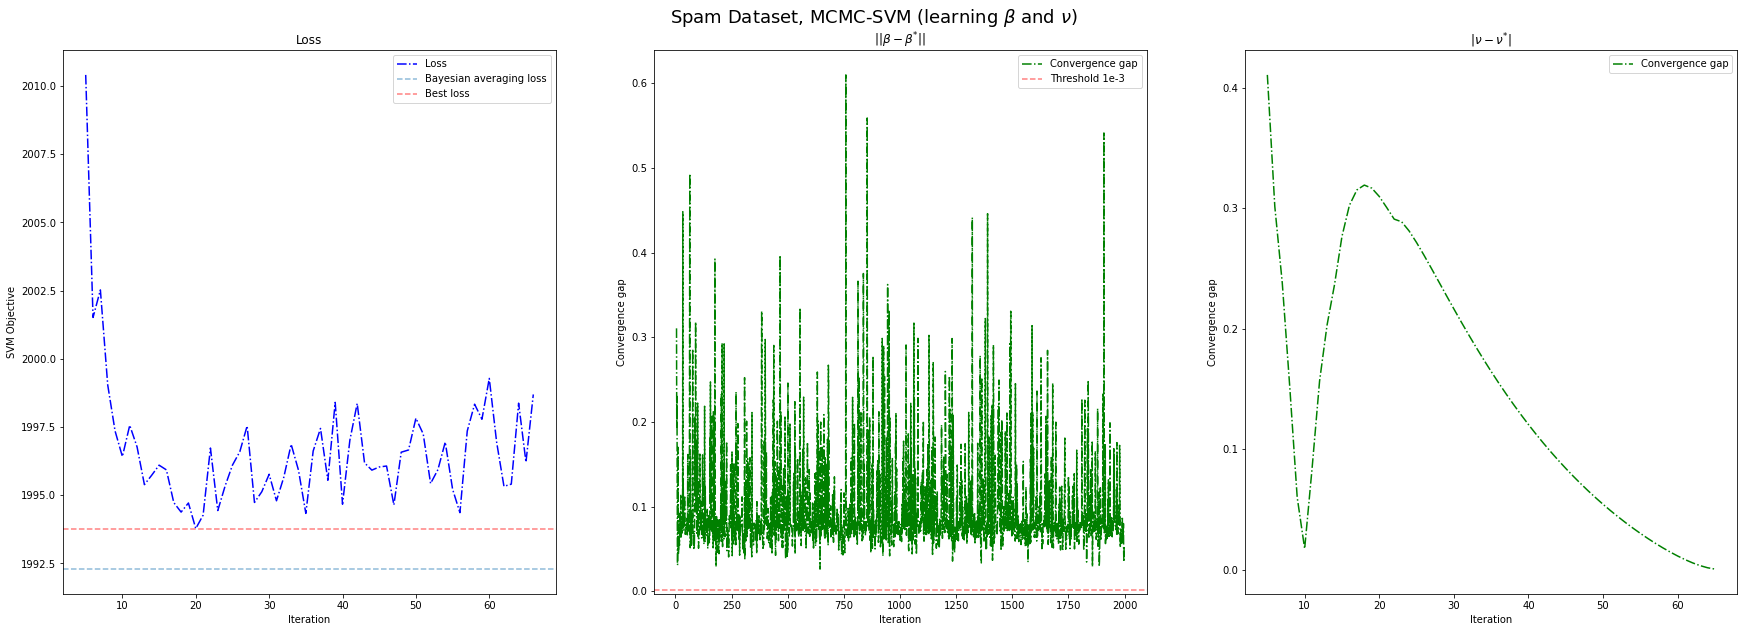

In [22]:
start_ind = 5

losses = np.array([compute_target(X_default, y_default, alpha=1, nu=nu, beta=beta) for beta, nu in zip(betas, nus)])
convergence_gap_beta = np.linalg.norm(betas - betas[-1], axis=1, ord=np.inf)[:-1]
convergence_gap_nu = np.abs(nus - nus[-1])[:-1]

b = b_values.mean(axis=0)
bayesian_averaging_loss = compute_target(X_default, y_default, alpha=1, nu=1, beta=b)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[0].plot(np.arange(start_ind, len(losses)), losses[start_ind:], label='Loss', linestyle='-.', c='b')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('SVM Objective')
axes[0].set_title('Loss')
axes[0].axhline(bayesian_averaging_loss, linestyle='--', label='Bayesian averaging loss', alpha=0.5)
axes[0].axhline(losses.min(), linestyle='--', label='Best loss', c='r', alpha=0.5)
axes[0].legend()

axes[1].plot(np.arange(start_ind, len(convergence_gap_beta)), convergence_gap_beta[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Convergence gap')
axes[1].set_title(r'$||\beta - \beta^{*}||$')
axes[1].axhline(1e-3, linestyle='--', label='Threshold 1e-3', c='r', alpha=0.5)
axes[1].legend()

axes[2].plot(np.arange(start_ind, len(convergence_gap_nu)), convergence_gap_nu[start_ind:], linestyle='-.', c='g', label='Convergence gap')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Convergence gap')
axes[2].set_title(r'$|\nu - \nu^{*}|$')
axes[2].legend()

plt.suptitle(r'Spam Dataset, MCMC-SVM (learning $\beta$ and $\nu$)', fontsize=18, y=0.94)

plt.show()

# 2) Accuracy performance on Spam dataset

In [5]:
X_spam_train, X_spam_other, y_spam_train, y_spam_other = train_test_split(
    X_spam, y_spam, test_size=0.4, random_state=0, shuffle=True, stratify=y_spam,
)

## 1) (Stable) EM-SVM (learning $\beta$)

In [10]:
betas = compute_stable_em_svm(X_spam_train, y_spam_train, alpha=1, nu=1, abs_eps=1e-3, max_iterations=2000, noisy=True, noise_period=200, seed=0)
losses = np.array([compute_target(X_spam_train, y_spam_train, alpha=1, nu=1, beta=beta) for beta in betas])
beta = betas[losses.argmin()]
acc_train = (np.sign(X_spam_train @ beta) == y_spam_train).mean()
acc_test = (np.sign(X_spam_test @ beta) == y_spam_test).mean()
print('EM-SVM Train Accuracy:', acc_train)
print('EM-SVM Test  Accuracy:', acc_test)

At iteration (0200/2000), loss = 583.894
At iteration (0400/2000), loss = 582.350
At iteration (0600/2000), loss = 582.031
At iteration (0800/2000), loss = 580.940
At iteration (1000/2000), loss = 580.414
At iteration (1200/2000), loss = 579.919
At iteration (1400/2000), loss = 579.433
At iteration (1600/2000), loss = 579.497
At iteration (1800/2000), loss = 579.241
At iteration (2000/2000), loss = 579.115
Finished run (2000/2000), loss = 579.115
EM-SVM Train Accuracy: 0.9344202898550724
EM-SVM Test  Accuracy: 0.9228260869565217


## 2) ECME-SVM (learning $\beta$ and $\nu$)

In [11]:
betas, nu_values = compute_ecme_svm(X_spam_train, y_spam_train, alpha=1, anu=1, bnu=1, abs_eps=1e-3, max_iterations=2000, noisy=True, noise_period=200, seed=0)
losses = np.array([compute_target(X_spam_train, y_spam_train, alpha=1, beta=beta, nu=nu) for beta, nu in zip(betas, nu_values)])
beta = betas[losses.argmin()]
acc_train = (np.sign(X_spam_train @ beta) == y_spam_train).mean()
acc_test = (np.sign(X_spam_test @ beta) == y_spam_test).mean()
print('ECME-SVM Train Accuracy:', acc_train)
print('ECME-SVM Test  Accuracy:', acc_test)

At iteration (0200/2000), loss = 591.104
At iteration (0400/2000), loss = 590.787
At iteration (0600/2000), loss = 589.563
At iteration (0800/2000), loss = 588.778
At iteration (1000/2000), loss = 587.715
At iteration (1200/2000), loss = 587.080
At iteration (1400/2000), loss = 586.099
At iteration (1600/2000), loss = 585.979
At iteration (1800/2000), loss = 585.925
At iteration (2000/2000), loss = 585.974
Finished run (2000/2000), loss = 585.974
EM-SVM Train Accuracy: 0.9340579710144927
EM-SVM Test  Accuracy: 0.9206521739130434


## 3) MCMC-SVM (learning $\beta$ with MC)

In [15]:
betas, b_values = compute_mcmc_svm(X_spam_train, y_spam_train, nu=1, max_iterations=2000, noisy=True, noise_period=200, abs_eps=1e-3, seed=0)
losses = np.array([compute_target(X_spam_train, y_spam_train, alpha=1, beta=beta, nu=1) for beta in betas])
beta = betas[losses.argmin()]
beta_bayes = b_values.mean(axis=0)
acc_train = (np.sign(X_spam_train @ beta) == y_spam_train).mean()
acc_test = (np.sign(X_spam_test @ beta) == y_spam_test).mean()
acc_train_bayes = (np.sign(X_spam_train @ beta_bayes) == y_spam_train).mean()
acc_test_bayes = (np.sign(X_spam_test @ beta_bayes) == y_spam_test).mean()
print('MCMC-SVM                      Train Accuracy:', acc_train)
print('MCMC-SVM                      Test  Accuracy:', acc_test)
print('MCMC-SVM (Bayesian Averaging) Train Accuracy:', acc_train_bayes)
print('MCMC-SVM (Bayesian Averaging) Test  Accuracy:', acc_test_bayes)

At iteration (0200/2000), loss = 601.849
At iteration (0400/2000), loss = 618.281
At iteration (0600/2000), loss = 602.255
At iteration (0800/2000), loss = 615.949
At iteration (1000/2000), loss = 606.307
At iteration (1200/2000), loss = 613.100
At iteration (1400/2000), loss = 607.738
At iteration (1600/2000), loss = 603.674
At iteration (1800/2000), loss = 602.492
At iteration (2000/2000), loss = 598.595
Finished run (2000/2000), loss = 598.595
MCMC-SVM                      Train Accuracy: 0.9347826086956522
MCMC-SVM                      Test  Accuracy: 0.9228260869565217
MCMC-SVM (Bayesian Averaging) Train Accuracy: 0.9344202898550724
MCMC-SVM (Bayesian Averaging) Test  Accuracy: 0.9228260869565217


## 4) MCMC-SVM (learning $\beta$ as well as $\nu$ with MC)

In [16]:
betas, b_values, nu_values = compute_mcmc_svm_with_nu(X_spam_train, y_spam_train, anu=1, bnu=1, max_iterations=2000, noisy=True, noise_period=200, abs_eps=1e-3, seed=0)
losses = np.array([compute_target(X_spam_train, y_spam_train, alpha=1, beta=beta, nu=nu) for beta, nu in zip(betas, nu_values)])
beta = betas[losses.argmin()]
beta_bayes = b_values.mean(axis=0)
acc_train = (np.sign(X_spam_train @ beta) == y_spam_train).mean()
acc_test = (np.sign(X_spam_test @ beta) == y_spam_test).mean()
acc_train_bayes = (np.sign(X_spam_train @ beta_bayes) == y_spam_train).mean()
acc_test_bayes = (np.sign(X_spam_test @ beta_bayes) == y_spam_test).mean()
print('MCMC-SVM 2                      Train Accuracy:', acc_train)
print('MCMC-SVM 2                      Test  Accuracy:', acc_test)
print('MCMC-SVM 2 (Bayesian Averaging) Train Accuracy:', acc_train_bayes)
print('MCMC-SVM 2 (Bayesian Averaging) Test  Accuracy:', acc_test_bayes)

At iteration (0200/2000), loss = 676.595
At iteration (0400/2000), loss = 660.447
At iteration (0600/2000), loss = 649.499
At iteration (0800/2000), loss = 653.570
At iteration (1000/2000), loss = 639.549
At iteration (1200/2000), loss = 655.658
At iteration (1400/2000), loss = 613.442
At iteration (1600/2000), loss = 640.410
At iteration (1800/2000), loss = 644.231
At iteration (2000/2000), loss = 636.396
Finished run (2000/2000), loss = 636.396
MCMC-SVM 2                      Train Accuracy: 0.9322463768115942
MCMC-SVM 2                      Test  Accuracy: 0.9271739130434783
MCMC-SVM 2 (Bayesian Averaging) Train Accuracy: 0.933695652173913
MCMC-SVM 2 (Bayesian Averaging) Test  Accuracy: 0.9217391304347826
